<a href="https://colab.research.google.com/github/Prezii/Proyect/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep learning Setup

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
#Install obspy
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
!pip install lxml sqlalchemy
!pip install pyreadline ipython
!pip install flake8 nose mock
!pip install -U obspy
import obspy

--2022-08-15 22:40:15--  https://bootstrap.pypa.io/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2560808 (2.4M) [text/x-python]
Saving to: ‘get-pip.py.3’

get-pip.py.3        100%[===================>]   2.44M  --.-KB/s    in 0.01s   

2022-08-15 22:40:15 (203 MB/s) - ‘get-pip.py.3’ saved [2560808/2560808]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pip-22.2.2-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
#Additional imports
import numpy as np
import matplotlib.pyplot as plt

#Load the data

In [ ]:
#Load in the data
# seismogram = tf.keras.datasets.seismogram

#(x_train,y_train), (x_test,y_test)= None
st = obspy.read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')

#Visualize the data

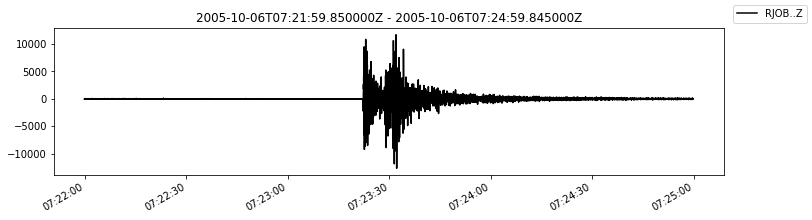

In [ ]:
tr = st[0]

start_time = tr.stats.starttime
end_time = tr.stats.endtime

#fig, ax = plt.subplots(2, 2, figsize=(8,6))
#fig, ax = plt.figure(figsize=(12, 3))

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(tr.times("matplotlib"), tr.data, color="0", label = f"{tr.stats.station}..{tr.stats.channel}")
ax.xaxis_date()
fig.autofmt_xdate()

fig.legend()
plt.title(f"{start_time} - {end_time}")
plt.show()

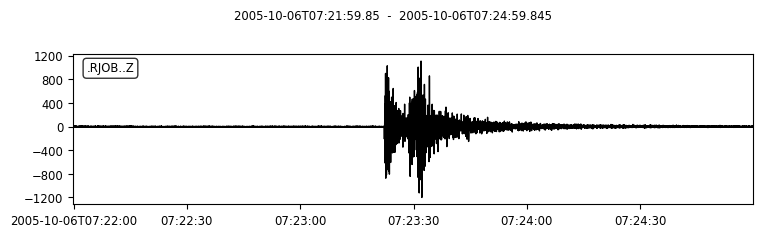

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


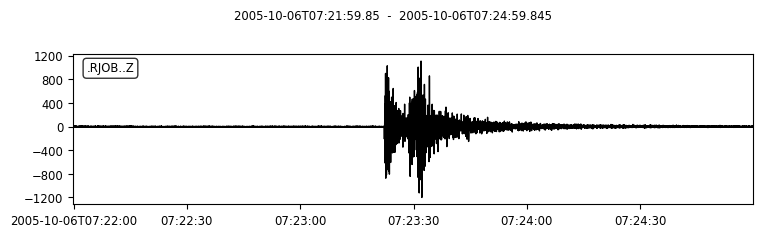

In [ ]:
#alternativa pero salen dos canales
tr.plot()

#Standardize the data
Se va a intentar utilizar scipy

Build a model

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    #1. Convolution - kernel 16x16 - filters 32
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    #2. Max pooling - kernel 2x2 - filters 32
    #3. Convolution - 8x8 - filters 64
    #2. Max pooling - 2x2 - filters 64
    #3. Convolution - 4x4 - filters 128

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

NameError: ignored

Train the model

In [ ]:
epochs = 50

Evaluate model on test data

Plot the model's training and validation loss

In [ ]:

#plt.figure()
#plt.plot(history.history[metric])
#plt.plot(history.history["val_" + metric])
#plt.title("model " + metric)
#plt.ylabel(metric, fontsize="large")
#plt.xlabel("epoch", fontsize="large")
#plt.legend(["train", "val"], loc="best")
#plt.close()
#plt.show()